In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [18]:
user_details = pd.read_excel(r"C:\Users\hp\Downloads\Data Analyst Intern Assignment - Excel.xlsx", sheet_name='UserDetails.csv')
print(user_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [17]:
cooking_sessions = pd.read_excel(r"C:\Users\hp\Downloads\Data Analyst Intern Assignment - Excel.xlsx", sheet_name='CookingSessions.csv')
print(cooking_sessions.head())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [20]:
order_details = pd.read_excel(r"C:\Users\hp\Downloads\Data Analyst Intern Assignment - Excel.xlsx", sheet_name='OrderDetails.csv')
print(order_details.head())

   Order ID User ID Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001 2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  


In [22]:
#1 Data Cleaning
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [25]:
#2 Merge datasets
user_cooking_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')
full_data = pd.merge(user_cooking_data, order_details, on=['User ID', 'User ID'], how='inner')


In [26]:
#3 Relationship Between Cooking sessions and user orders
full_data['CookedAndOrdered'] = full_data['Dish Name_x'] == full_data['Dish Name_y']
cooked_ordered_ratio = full_data['CookedAndOrdered'].mean()
print(f"Percentage of cooked dishes ordered: {cooked_ordered_ratio * 100:.2f}%")

Percentage of cooked dishes ordered: 42.11%


In [33]:
#4 Demographic analysis (Age vs. Total Orders)
demographic_analysis = user_details.groupby('Age')['Total Orders'].mean().reset_index()
print("Average total orders by age:\n", demographic_analysis)

Average total orders by age:
    Age  Total Orders
0   25           7.0
1   27          10.0
2   28          12.0
3   29           8.0
4   30           9.0
5   31           5.0
6   33           6.0
7   35           8.0
8   38          14.0
9   42          15.0


Text(0.5, 1.0, 'Session Rating vs Ordering Behavior')

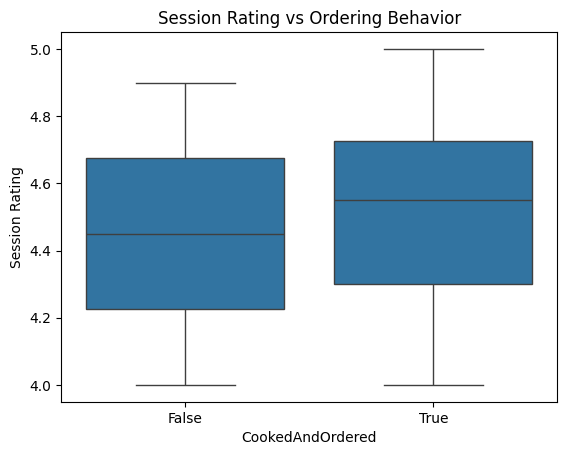

In [27]:
# Impact of Cooking Session Ratings on Orders:
sns.boxplot(x='CookedAndOrdered', y='Session Rating', data=full_data)
plt.title("Session Rating vs Ordering Behavior")

Text(0.5, 1.0, 'Orders by Time of Day')

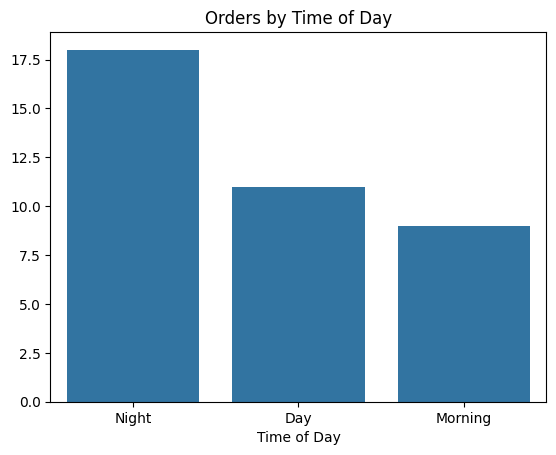

In [28]:
#Order Frequency by Time of Day:
orders_by_time = full_data['Time of Day'].value_counts()
sns.barplot(x=orders_by_time.index, y=orders_by_time.values)
plt.title("Orders by Time of Day")

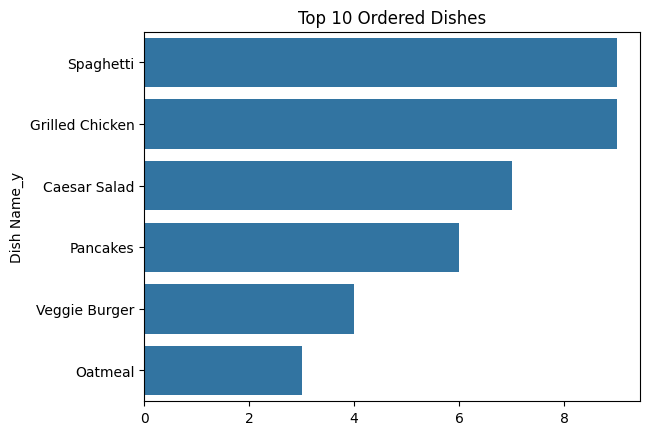

In [29]:
#5 Popular Dishes
popular_dishes = full_data['Dish Name_y'].value_counts().head(10)
sns.barplot(x=popular_dishes.values, y=popular_dishes.index)
plt.title("Top 10 Ordered Dishes")
plt.show()


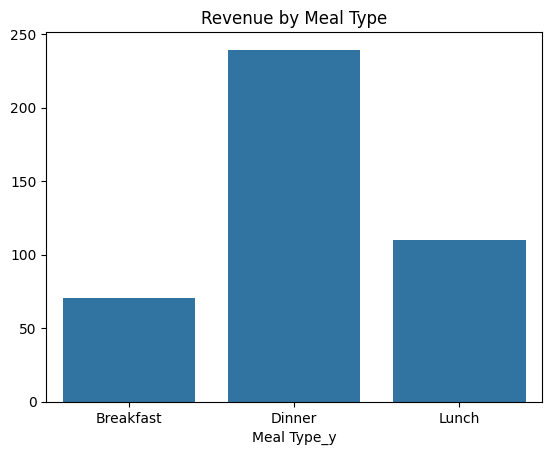

In [30]:
# Revenue by Meal Type
revenue_by_meal = full_data.groupby('Meal Type_y')['Amount (USD)'].sum()
sns.barplot(x=revenue_by_meal.index, y=revenue_by_meal.values)
plt.title("Revenue by Meal Type")
plt.show()